# Decision Tree
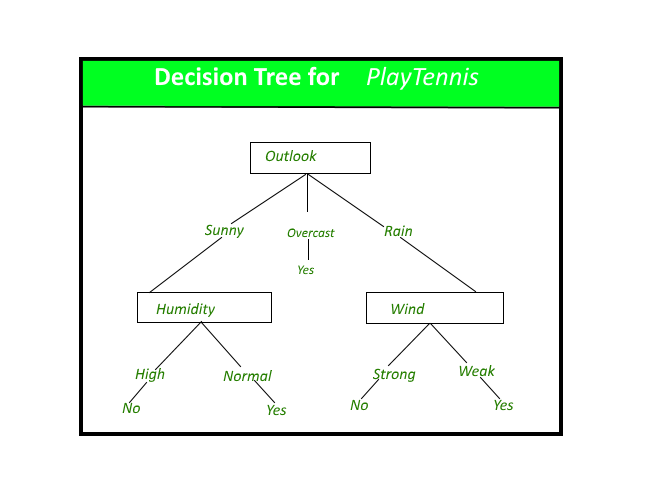

# Overview
Decision trees are supervised learning algorithms that can be used for both classification and regression tasks. A decision tree is a tree-like model of decisions and their possible consequences. It is a series of binary decisions, with each internal node representing a decision based on a feature, and each leaf node representing a class label or a numerical value.

The algorithm works by recursively partitioning the data based on the feature that provides the most information gain or the best split. 

# Advantage
1. Easy of use, and can handle both categorical and numerical data. 
2. Can be used for feature selection, as they can identify the most important features for making accurate predictions.

# Disadvantage
1. Prone to overfitting, which occurs when the model captures noise in the training data
2. Sensitive to small variations in the data, and dampen accuracies.

# Data
The Palmer penguins dataset is a collection of data on three different species of penguins, namely Adelie, Chinstrap, and Gentoo, collected on three islands in the Palmer Archipelago, Antarctica. The dataset contains various physical measurements of penguins, including culmen length, culmen depth, flipper length, and body mass, as well as information on the sex and age of each penguin.

The dataset is used for machine learning tasks liek classification, where the goal is to predict the penguin class based on its characteristics.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from mlxtend.plotting import plot_decision_regions
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In this analysis, we will explore the relationship between two key features of 2 categories of penguins, Adelie and Chinstrap, as well as their bill length and bill depth, and how these features can be used to differentiate between penguins. By visualizing the relationship between these features, we can gain a deeper understanding of how they may be useful in classifying category of penguin.

[Text(0.5, 0, 'Bill length'), Text(0, 0.5, 'Bill depth')]

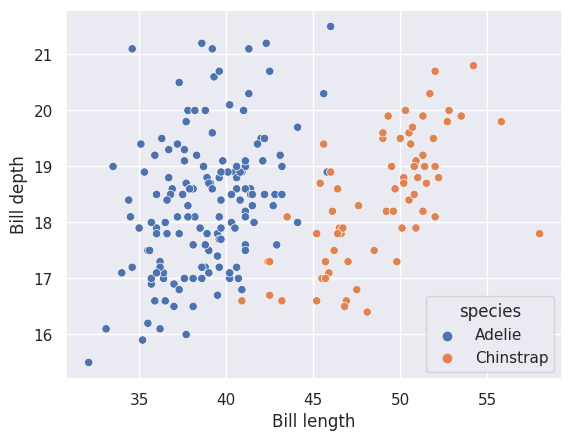

In [8]:
sns.set_theme() 
df = pd.read_csv("palmer_penguins.csv")
df = df.dropna()

# Choose 2 species Adelie and Gentoo
df = df[df["species"].isin(["Adelie", "Chinstrap"])]
# Visualize chosen data
sns.scatterplot(data=df, x="bill_length_mm", y="bill_depth_mm", hue="species").set( 
                                        xlabel='Bill length', 
                                        ylabel='Bill depth')

Split the data into training and testing set, visualize again to ensure the training set is similar to the whole dataset.

[Text(0.5, 0, 'Bill length'), Text(0, 0.5, 'Bill depth')]

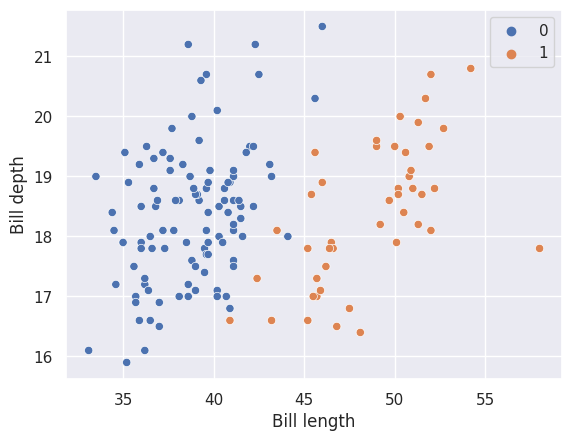

In [9]:
X = df[["bill_length_mm", "bill_depth_mm"]].to_numpy()
y = df[["species"]].to_numpy()
y_int = np.where(y == 'Adelie', 0, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y_int, test_size = 0.3, random_state = 42)
sns.scatterplot(x = X_train[:, 0], y = X_train[:, 1], hue = y_train.flatten()).set( 
                                        xlabel='Bill length', 
                                        ylabel='Bill depth')

We will use the DecisionTreeClassifier class from the Scikit-learn library to create a decision tree model. We can instantiate the model by creating an instance of this class, which we can configure by passing in various arguments. 

Once we have our model, we can train it on our data by calling the fit() method of the model instance. This will cause the model to learn the patterns in the data and create a decision tree that can be used to make predictions.

In [10]:
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree.fit(X_train, y_train)

tree_rules = export_text(decision_tree, feature_names = ["bill_length_mm", "bill_depth_mm"])
print(tree_rules, "\n")

|--- bill_length_mm <= 43.15
|   |--- bill_length_mm <= 42.35
|   |   |--- bill_depth_mm <= 16.70
|   |   |   |--- bill_length_mm <= 38.95
|   |   |   |   |--- class: 0
|   |   |   |--- bill_length_mm >  38.95
|   |   |   |   |--- class: 1
|   |   |--- bill_depth_mm >  16.70
|   |   |   |--- class: 0
|   |--- bill_length_mm >  42.35
|   |   |--- bill_depth_mm <= 18.25
|   |   |   |--- class: 1
|   |   |--- bill_depth_mm >  18.25
|   |   |   |--- class: 0
|--- bill_length_mm >  43.15
|   |--- bill_depth_mm <= 21.15
|   |   |--- bill_length_mm <= 44.65
|   |   |   |--- bill_length_mm <= 43.80
|   |   |   |   |--- bill_depth_mm <= 18.55
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- bill_depth_mm >  18.55
|   |   |   |   |   |--- class: 0
|   |   |   |--- bill_length_mm >  43.80
|   |   |   |   |--- class: 0
|   |   |--- bill_length_mm >  44.65
|   |   |   |--- bill_depth_mm <= 20.15
|   |   |   |   |--- class: 1
|   |   |   |--- bill_depth_mm >  20.15
|   |   |   |   |--- bill_le

To visualize the tree structure of the trained decision tree model, we can use the sklearn.tree.plot_tree() function.

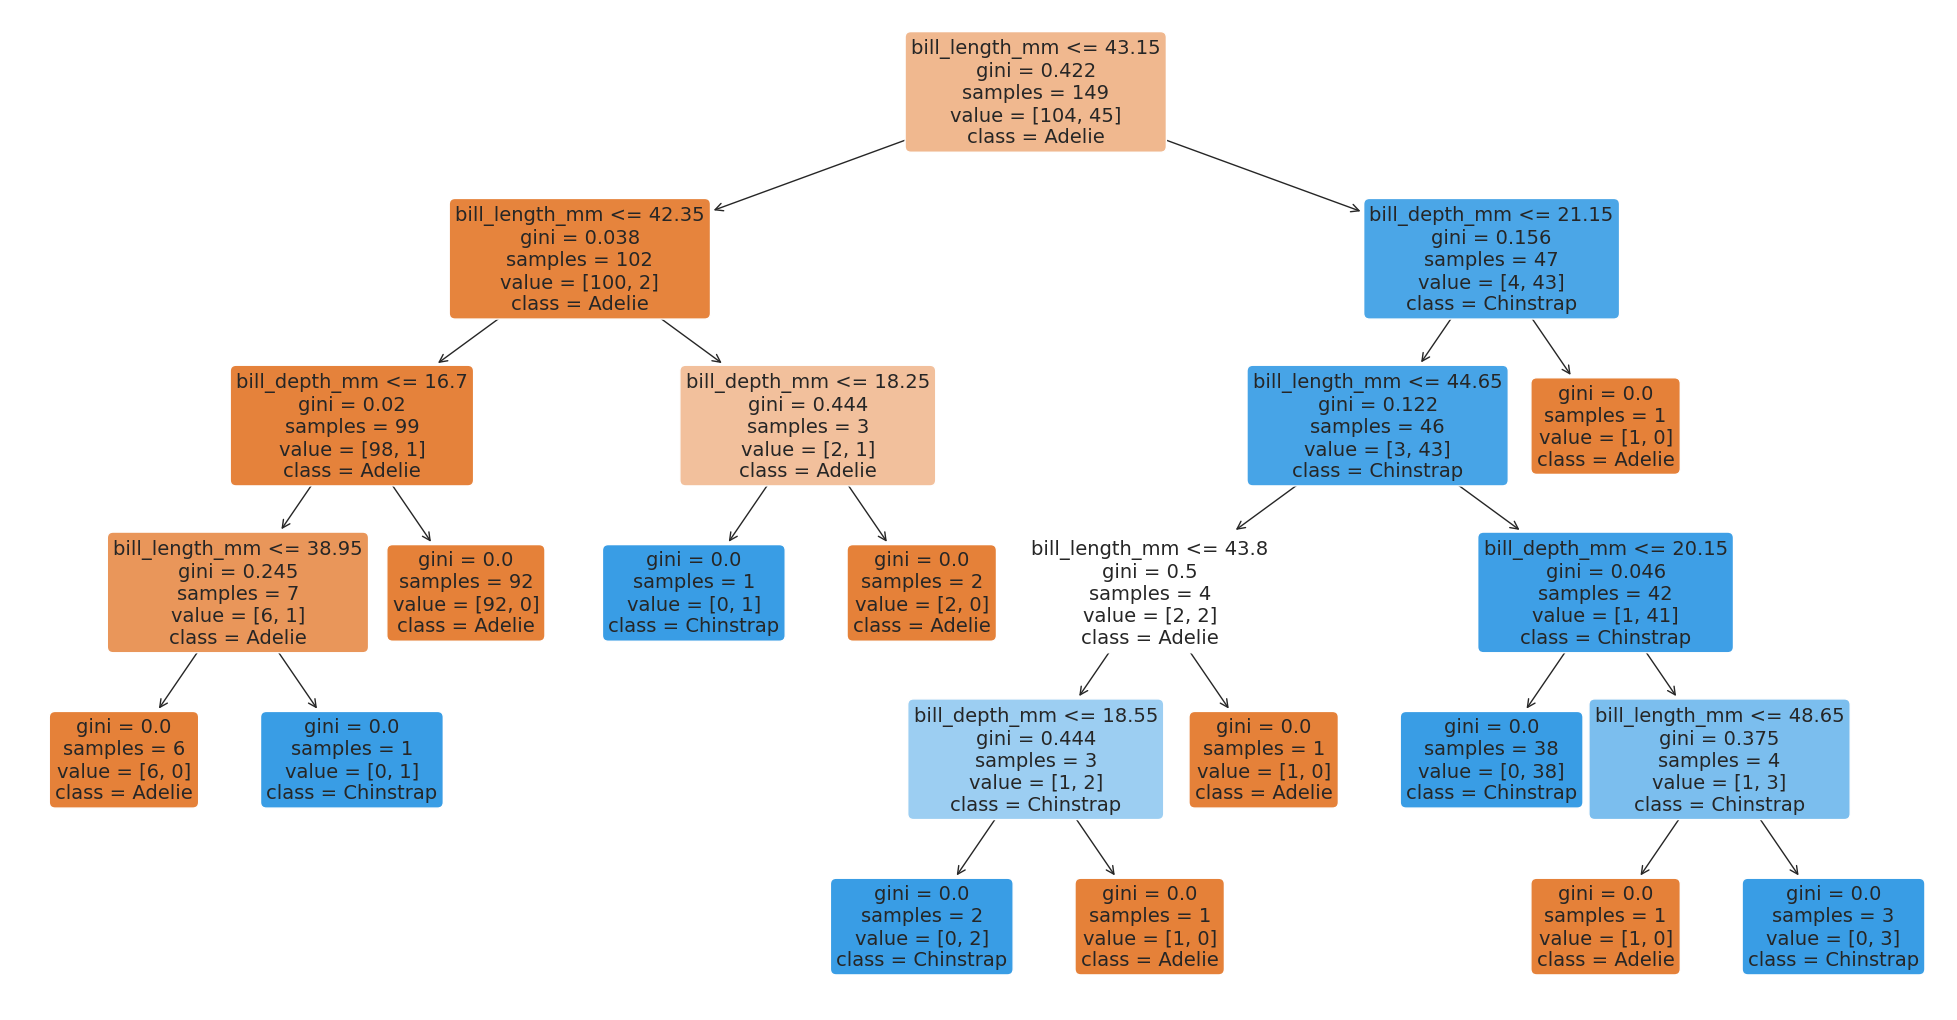

In [11]:
plt.figure(figsize=(25, 13))
a = plot_tree(decision_tree,
                   feature_names = ["bill_length_mm", "bill_depth_mm"],
                   class_names = ["Adelie", "Chinstrap"],
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

WE can visualize our results clearer using a decision regions.

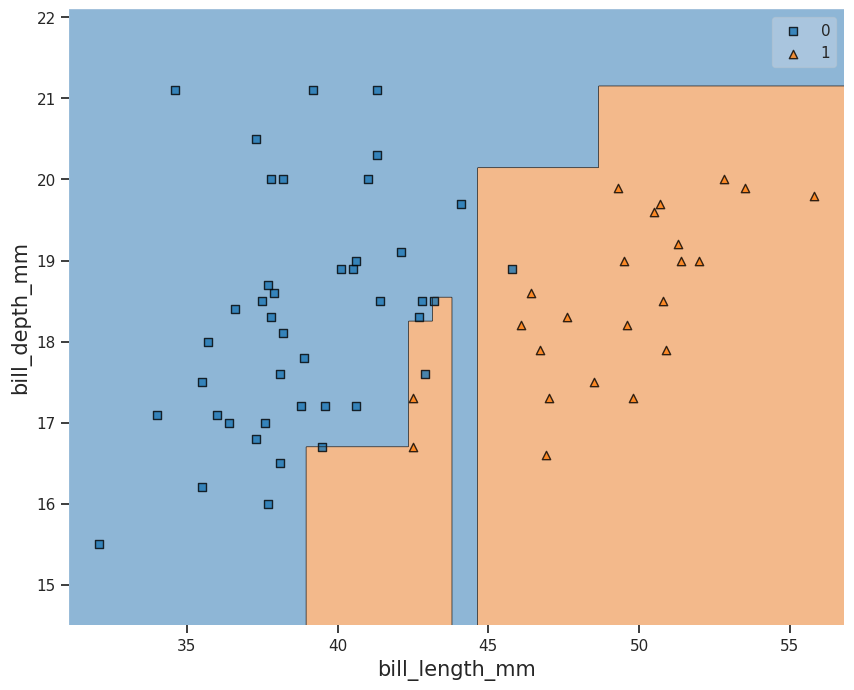

In [12]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X_test, y_test.flatten(), clf = decision_tree)
plt.xlabel("bill_length_mm", fontsize = 15)
plt.ylabel("bill_depth_mm", fontsize = 15)
plt.grid()
plt.show()

There are some points that are outlier. We can also create a confusion matrix to visualize the performance of our perceptron. A confusion matrix is a table that summarizes the performance of a machine learning classification algorithm by comparing the predicted labels to the actual labels of a set of test data. The matrix contains four elements: true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

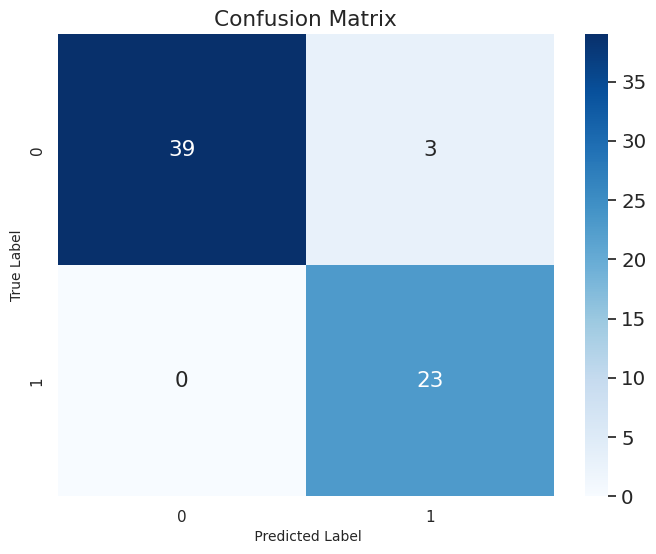

In [13]:
y_pred = decision_tree.predict(X_test)
confusion_matrix = metrics.confusion_matrix (y_test, y_pred)
matrix_ppn = pd.DataFrame (confusion_matrix)
plt.figure (figsize =(8,6))
ax= plt.axes ()
sns.set (font_scale =1.3)
sns.heatmap(matrix_ppn, 
            annot =True,
           fmt = 'g',
           ax = ax,
          cmap=plt.cm.Blues)
ax.set_title ('Confusion Matrix')
ax.set_xlabel (' Predicted Label', fontsize =10)
ax.set_ylabel ('True Label', fontsize =10)
plt.show ()

We can also qunaitfy our decision tree performance using accuracy and precision. Accuracy is the measure of how often the model is correct. It is calculated as the ratio of the number of correctly classified instances to the total number of instances. A high accuracy indicates that the model is making correct predictions for most of the instances.

Precision is the measure of how often the model correctly predicts the positive class. It is calculated as the ratio of the number of true positives to the total number of instances predicted as positive. A high precision indicates that the model is making correct predictions for the positive class, and there are fewer false positives.

In [15]:
precision = metrics.precision_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Precision : " + str(precision))
print("Accuracy : " + str(accuracy))

Precision : 0.8846153846153846
Accuracy : 0.9538461538461539


We can test our decision tree model over a range of depth which refers to the length of the tree from the root node to the leaf node. The depth of the tree controls the complexity of the model, and it plays an important role in the performance of the model.

[Text(0.5, 0, 'Depth'), Text(0, 0.5, 'Score')]

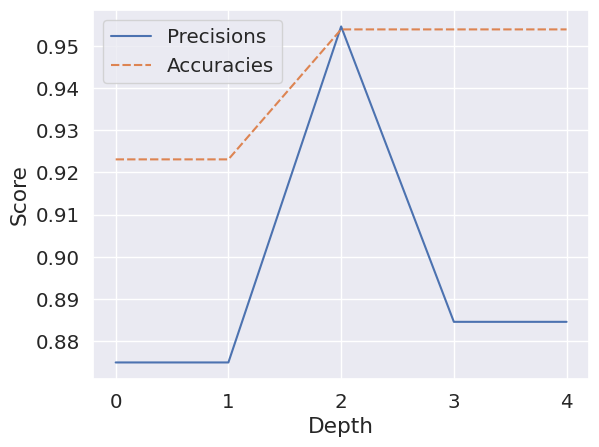

In [16]:
possible_depth = [k for k in range(1, 6, 1)]
precisions = []
accuracies = []
for de in possible_depth:
    decision_tree_i = DecisionTreeClassifier(max_depth=de, random_state=42)
    decision_tree_i.fit(X_train, y_train)
    y_pred_i = decision_tree_i.predict(X_test)
    precisions.append(metrics.precision_score(y_test, y_pred_i))
    accuracies.append(metrics.accuracy_score(y_test, y_pred_i))
    
metrics_df = pd.DataFrame({'Depths': possible_depth,
                           'Precisions': precisions,
                           'Accuracies': accuracies})

sns.lineplot(data=metrics_df[['Precisions', 'Accuracies']]).set( 
                                        xlabel='Depth', 
                                        ylabel='Score')

# Conclusion
It looks like depth = 2 gives you the highest precision and accuracy. Therefore, it is important to find the correct depth that balances between underfitting and overfitting, which can be achieved by tuning the hyperparameters of the model.